# 2.3.7 DBSCAN Scikit-learn Demo

#### The DBSCAN algorithm views clusters as areas of high density separated by areas of low density.
#### Cluster -> composed of a set of core samples and a set of non-core samples
#### Core sample -> there exist min_samples other samples within a distance of eps
#### min_samples controls how tolerant the algorithm is towards noise, the parameter eps is crucial to choose appropriately for the data set and distance function and usually cannot be left at the default value

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
# generate isotropic gaussian blobs for clustering (generate samples)
from sklearn.datasets import make_blobs
# standardize features by removing the mean and scaling to unit variance
# the standard score of a sample x is calculated as z = (x - u) / x
# u -> mean, zero if with_mean=False; s -> standard deviation, one if with_std=False
from sklearn.preprocessing import StandardScaler

### Generate sample data with make_blobs

In [61]:
centers = [[1, 1], [-1, -1], [1, -1]]
# x is the data, and labels_true is the true outcome
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
X.shape

(750, 2)

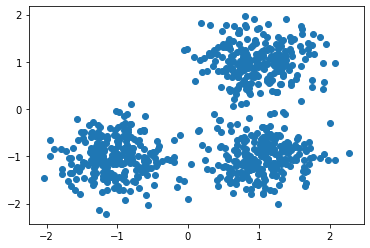

In [62]:
plt.scatter(X[:, 0], x[:, 1])

### standardize the data

In [63]:
X = StandardScaler().fit_transform(X)

### Compute DBSCAN

In [64]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# the predicted cluster
db.labels_[:10]

array([0, 1, 0, 2, 0, 1, 1, 2, 0, 0])

### Plot the clusteres

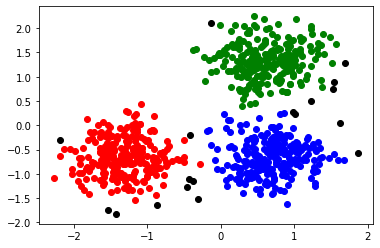

In [65]:
df = pd.DataFrame(X, columns=['x', 'y'])
df['cluster'] = db.labels_

df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]
df3 = df[df['cluster']==-1]

plt.scatter(df0.x, df0.y, color='green')
plt.scatter(df1.x, df1.y, color='red')
plt.scatter(df2.x, df2.y, color='blue')
plt.scatter(df3.x, df3.y, color='black')

In [66]:
# return an array of zeros with the same shape and type as a given array
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [67]:
# get the index
print(db.core_sample_indices_)
# why use [db.core_samples_indices] instead of [:]
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

[  0   1   2   3   4   6   7   8   9  10  11  12  13  15  17  19  20  21
  22  23  24  25  26  27  28  29  30  31  33  34  35  36  37  38  40  41
  42  43  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  77  78  79
  80  81  83  84  86  87  88  89  90  91  92  93  94  96  97  98  99 100
 101 102 103 104 106 107 109 111 112 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 136 137 138 139 140 141
 142 143 144 145 147 148 150 151 152 153 155 157 159 160 162 163 164 166
 167 168 169 170 171 172 173 174 175 176 177 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 197 198 199 200 201 203 204 205
 206 207 208 209 210 211 212 213 214 216 217 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 239 240 241 242 243 244
 246 247 248 249 250 251 252 253 254 255 256 257 258 260 261 262 263 264
 266 267 268 269 270 271 272 274 275 276 277 278 27

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [68]:
# get the cluster labels for each point in the dataset
labels = db.labels_

In [69]:
# use set() to eliminate the dupliactes
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [70]:
# number of noisy data
n_noise_ = list(labels).count(-1)
n_noise_

18

In [71]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print('Homogeneity: %0.3f' % metrics.homogeneity_score(labels_true, labels))
print('completeness: %0.3f' % metrics.completeness_score(labels_true, labels))
print('V-measure: %0.3f' % metrics.v_measure_score(labels_true, labels))
print('Adjusted Rand Index: %0.3f' % metrics.adjusted_rand_score(labels_true, labels))
print('Adjusted Mutual Information: %0.3f' % metrics.adjusted_mutual_info_score(labels_true, labels))
print('Silhouette Coefficient: %0.3f' % metrics.silhouette_score(x, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


### Another way to plot the data

In [72]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
         for each in np.linspace(0, 1, len(unique_labels))]

(224, 2)
(19, 2)
(228, 2)
(16, 2)
(227, 2)
(18, 2)
(0, 2)
(18, 2)


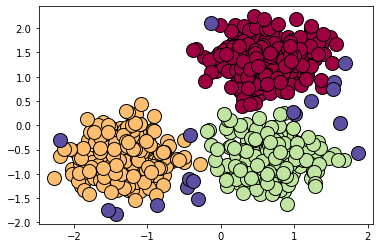

In [83]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        color = [0, 0, 0, 1]
    
    class_member_mask = (labels == k)
    
    xy = X[class_member_mask & core_samples_mask]
    print(xy.shape)
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
    
    xy = X[class_member_mask & ~core_samples_mask]
    print(xy.shape)
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)